In [7]:
import tensorflow as tf
from tensorflow import keras
import seaborn as sns
from matplotlib import pyplot as plt
import numpy as np
import tensorflow_hub as hub
import tensorflow_text as text

In [8]:
# Download and add your BERT Model
bert = r"<BERT MODEL>"
# Download and add your Preprocess Model
preprocessor = r"<PREPROCESS MODEL>"

In [9]:
encoder = hub.KerasLayer(bert)

In [4]:
preprocess = hub.KerasLayer(preprocessor)

In [5]:
text_input = tf.keras.layers.Input(shape=(), dtype=tf.string, name='text')

In [6]:
preprocessed_text = preprocess(text_input)

In [7]:
outputs = encoder(preprocessed_text)

In [8]:
dense_1 = tf.keras.layers.Dropout(0.4, name="dropout")(outputs['pooled_output'])

In [9]:
output = tf.keras.layers.Dense(7, activation='softmax', name="output")(dense_1)

In [10]:
model = tf.keras.Model(inputs=[text_input], outputs = [output])

In [11]:
model.compile(optimizer='adam', loss='sparse_categorical_crossentropy',metrics=['accuracy'])

In [22]:
import pandas as pd
clf_df = pd.read_excel("./preprocessed.xlsx", engine="openpyxl")

In [23]:
clf_df

,Unnamed: 0.1,Unnamed: 0,text,date,user,comments,retweets,likes,quotes,type,preprocessed_text
0,0,0,"Almost 3,000 died and more than two million pe...","Dec 9, 2023 · 7:02 AM UTC",Sinar Daily,0,0,0,0,Damage,almost died two million people suffered damage...
1,1,1,Recovering from disasters takes time. Three m...,"Dec 8, 2023 · 3:54 PM UTC",Jagan Chapagain,0,8,22,0,Damage,recovering disasters takes time three months a...
2,2,2,#Earthquake 76 km SW of #Marrakech (#Morocco) ...,"Sep 8, 2023 · 10:40 PM UTC",EMSC,2,47,74,7,Damage,earthquake km sw marrakech morocco min ago loc...
3,3,3,"A rare, strong earthquake that occurred late o...","Sep 10, 2023 · 2:26 PM UTC",SA News Channel,15,1182,1139,2,Damage,rare strong earthquake occurred late friday ni...
4,4,4,The earthquake that struck Morocco in Septembe...,"Nov 29, 2023 · 6:37 PM UTC",GlobalMedic,0,2,2,0,Damage,earthquake struck morocco september caused ext...
...,...,...,...,...,...,...,...,...,...,...,...
8524,8524,8524,"VIDEO | ""Before starting with the formal proce...","Sep 9, 2023 · 5:20 AM UTC",Press Trust of India,10,12,98,2,Sympathy,video starting formal proceedings express symp...
8525,8525,8525,I would like to express my deepest sympathy to...,"Sep 9, 2023 · 3:05 AM UTC",Sanjeev Kamboj 🇮🇳,1,0,1,0,Sympathy,would like express deepest sympathy affected d...
8526,8526,8526,"The Propeht Muhammad, peace be upon him, said:...","Sep 9, 2023 · 1:45 AM UTC",EA SQUAD FC,0,1,4,0,Sympathy,propeht muhammad peace upon said example belie...
8527,8527,8527,We extend our deepest sympathy ad heartfelt co...,"Feb 16, 2023 · 10:10 AM UTC",Germany in Morocco,0,2,4,0,Sympathy,extend deepest sympathy ad heartfelt condolenc...


In [24]:
clf_df.type.value_counts()

type
Death       5788
Damage      1217
Alert        483
Impact       405
Sympathy     335
Injury       174
Help         127
Name: count, dtype: int64

In [28]:
clf_df.isna().sum()

Unnamed: 0.1         0
Unnamed: 0           0
text                 0
date                 0
user                 0
comments             0
retweets             0
likes                0
quotes               0
type                 0
preprocessed_text    0
dtype: int64

In [29]:
def function_1(x):
    if x == "Death":
        return 0
    elif x == "Damage":
        return 1
    elif x == "Alert":
        return 2
    elif x == "Impact":
        return 3
    elif x == "Sympathy":
        return 4
    elif x == "Injury":
        return 5
    elif x == "Help":
        return 6

In [30]:
clf_df['type_0'] = clf_df['type'].apply(lambda x: int(function_1(x)))

0       False
1       False
2       False
3       False
4       False
        ...  
8524    False
8525    False
8526    False
8527    False
8528    False
Name: type_0, Length: 8529, dtype: bool

In [32]:
from sklearn.model_selection import train_test_split

In [37]:
X = clf_df['preprocessed_text']
y = clf_df['type_0']

In [38]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, stratify=y)

In [40]:
model.fit(X_train, y_train, epochs=3)

Epoch 1/3
214/214 [==============================] - 913s 4s/step - loss: 1.0526 - accuracy: 0.6732
Epoch 2/3
214/214 [==============================] - 1032s 5s/step - loss: 0.9978 - accuracy: 0.6806
Epoch 3/3
214/214 [==============================] - 991s 5s/step - loss: 0.9785 - accuracy: 0.6874


C:\Users\91997\AppData\Local\Temp\ipykernel_2776\495544080.py:1: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(x=y, palette=['red', 'blue', 'green', 'yellow', 'pink', 'purple', 'brown'])


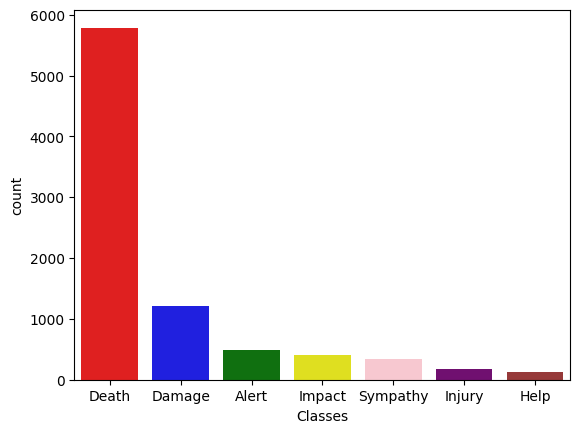

In [47]:
sns.countplot(x=y, palette=['red', 'blue', 'green', 'yellow', 'pink', 'purple', 'brown'])
plt.xticks([0, 1, 2, 3, 4, 5, 6], ["Death", "Damage", "Alert", "Impact", "Sympathy", "Injury", "Help"])
plt.xlabel("Classes")
plt.savefig("classes.png", bbox_inches="tight")

In [48]:
y_pred = model.predict(X_test)

54/54 [==============================] - 333s 6s/step


In [10]:
pip freeze > requirements.txt

Note: you may need to restart the kernel to use updated packages.
